Simple Linear Regression using Gradient Descent Approach

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data= pd.read_csv('student_info.csv')

In [109]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,5.67,71.82
3,8.67,84.19
4,7.55,81.18


In [110]:
data.shape

(195, 2)

In [111]:
import seaborn as sns

<AxesSubplot:xlabel='study_hours', ylabel='student_marks'>

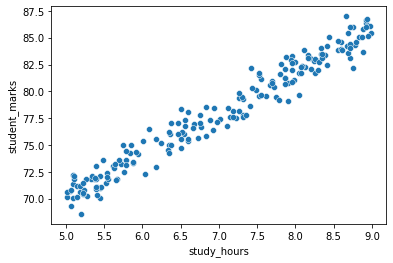

In [112]:
sns.scatterplot(x='study_hours', y='student_marks', data=data)

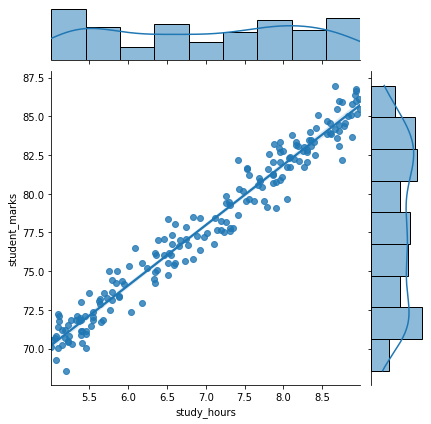

In [113]:
sns.jointplot(x='study_hours', y='student_marks', data=data, kind='reg')

In [173]:
X= data['study_hours'].values
y= data['student_marks'].values

In [174]:
X

array([6.83, 6.56, 5.67, 8.67, 7.55, 6.67, 8.99, 5.19, 6.75, 6.59, 8.56,
       7.75, 7.9 , 8.19, 6.55, 6.36, 8.44, 8.41, 7.67, 7.42, 8.16, 5.05,
       5.85, 5.45, 7.96, 6.51, 6.73, 5.94, 7.48, 8.13, 5.4 , 8.78, 8.72,
       7.1 , 7.86, 7.19, 5.62, 7.88, 5.28, 8.92, 5.46, 8.3 , 8.09, 6.18,
       7.01, 5.01, 5.54, 5.09, 5.09, 7.31, 8.71, 5.52, 8.76, 8.69, 5.75,
       8.93, 5.39, 5.65, 5.49, 7.26, 6.35, 7.72, 8.88, 5.45, 7.86, 8.26,
       5.07, 8.25, 5.37, 5.11, 6.35, 7.41, 7.31, 6.04, 5.11, 6.56, 5.09,
       5.88, 8.34, 7.94, 6.66, 6.01, 6.88, 5.63, 5.88, 8.05, 5.33, 8.79,
       7.52, 8.2 , 5.44, 7.9 , 7.69, 6.09, 5.2 , 8.88, 8.07, 6.24, 7.95,
       8.26, 7.31, 7.23, 6.46, 5.34, 5.72, 5.84, 5.02, 7.98, 6.37, 6.92,
       7.95, 7.12, 5.79, 5.4 , 8.83, 5.69, 6.6 , 6.52, 8.31, 7.62, 8.69,
       8.75, 6.46, 7.14, 6.38, 6.33, 5.64, 5.26, 6.83, 5.76, 6.51, 8.33,
       8.16, 5.14, 8.71, 8.6 , 8.6 , 7.43, 7.81, 6.51, 8.11, 8.95, 7.99,
       5.92, 8.3 , 8.97, 5.39, 6.77, 8.08, 5.24, 6.

In [175]:
y

array([78.5 , 76.74, 71.82, 84.19, 81.18, 76.99, 85.46, 70.66, 77.82,
       75.37, 83.88, 79.5 , 80.76, 83.08, 76.03, 76.04, 85.11, 82.5 ,
       80.58, 82.18, 83.36, 70.67, 75.02, 70.96, 83.33, 74.75, 75.65,
       74.15, 80.17, 82.27, 71.1 , 84.35, 83.08, 76.76, 81.24, 78.21,
       73.08, 83.23, 70.27, 86.41, 71.1 , 82.84, 82.38, 72.96, 77.46,
       70.11, 72.38, 71.41, 72.22, 77.77, 84.44, 71.45, 82.21, 85.48,
       75.03, 86.65, 70.9 , 71.7 , 73.61, 79.41, 76.19, 80.43, 85.78,
       70.06, 81.25, 81.7 , 69.27, 82.79, 71.8 , 71.79, 74.97, 78.61,
       77.59, 72.33, 72.08, 77.33, 70.05, 73.34, 84.  , 82.93, 76.63,
       75.36, 77.29, 72.87, 73.4 , 81.74, 71.85, 84.6 , 79.56, 82.1 ,
       72.08, 79.1 , 81.01, 76.48, 68.57, 83.64, 82.3 , 75.18, 82.03,
       82.99, 79.26, 77.55, 77.07, 72.1 , 73.25, 74.25, 70.58, 81.08,
       75.04, 76.38, 80.86, 78.42, 74.44, 70.34, 85.04, 73.61, 75.55,
       76.2 , 82.69, 79.53, 83.57, 85.95, 76.02, 77.65, 77.01, 74.49,
       73.19, 71.86,

In [176]:
def mse(slope, intercept, X, y):
    total_error= 0
    predictions= []
    n=len(X)
    for i in range(n):
        predictions.append((slope*X[i])+ intercept)
        total_error += (y[i]- ((slope*X[i])+ intercept))**2
        
    error= total_error/ float(n)
    return error, predictions

In [177]:
def grad_des(s_slope, s_intercept, X, y, lr, itery):
    
    for i in range(itery):
        int_slope= 0
        int_intercept= 0
        n= float(len(X))
    
        for j in range(len(X)):
            int_intercept += -(2/n)*(y[j]-((s_slope* X[j])+s_intercept))
            int_slope += -(2/n)*X[j]*(y[j]-((s_slope*X[j])+s_intercept))
            
        final_slope= s_slope- (lr*int_slope)
        final_intercept= s_intercept -(lr*int_intercept)
        s_slope= final_slope
        s_intercept= final_intercept

    return s_slope, s_intercept

In [231]:
itery= 5000
lr= 0.01
start_slope=0
start_intercept=0

grad_slope, grad_intercept= grad_des(start_slope, start_intercept, X,y, lr, itery)

final_errorval, final_pred= mse(grad_slope, grad_intercept, X, y)

In [232]:
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_errorval)

Slope of the model 4.224193406416701
Intercept of the model 48.33723155635999
Error value of the model 1.154906105269955


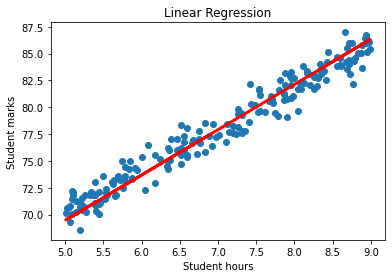

In [246]:
plt.scatter(X, y)
plt.plot(X, final_pred , linewidth=3, c='r')
plt.xlabel('Student hours')
plt.ylabel('Student marks')
plt.title('Linear Regression')
plt.show()